<a href="https://colab.research.google.com/github/EisaacJC/Simulacion_tres_cuerpos/blob/master/DosmasasAcopladas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problema de dos masas acopladas con resortes


\begin{align}
H&=\frac{1}{2m}P_1^2+\frac{1}{2m}P_2^2+\frac{1}{2}k_1x_1^2+\frac{1}{2}k_2(x_2-x_1)^2+\frac{1}{2}k_3x_2^2
\end{align}

\begin{align}
\dot{x_1}&=\frac{\partial H}{\partial P_1}=\frac{P_1}{m_1} \\
\dot{x_2}&=\frac{\partial H}{\partial P_2}=\frac{P_2}{m_1}  \\
\dot{p_{1x}}&=-[k_1x_1-k_2(x_2-x_1)] \\
\dot{p_{2x}}&=-[k_3x_2-k_2(x_2-x_1)]
\end{align} 

In [0]:
import numpy as np 

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0 
m2 = 1.0

In [0]:
def Q_Dot(Q):
  #regresa la derivada del vector Q
  x1, x2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
  x1_dot = p1/m1
  x2_dot = p2/m2
  p1_dot = -(k1*x1-k2*(x2-x1))
  p2_dot = -(k3*x2+k2*(x2-x1))
  return np.array([x1_dot, x2_dot, p1_dot, p2_dot])

In [0]:
def paso_euler(f, t_n, y_n, dt):
  #toma un paso usando el metodo de Euler, y_n-valor actual del vector at tiempo t=t_n, f - funcion de calcula la derivada de y(t)
  y_dot = f(t_n,y_n)
  y_n_mas_1 = y_n + dt*y_dot
  return y_n_mas_1

In [0]:
import time

In [0]:
def integrador_simple(f, t, y_0, dt):
  #Calcula la trayectoria de valores de y usando el metodo de Euler con pasos constantes
  # f - función que calcula la derivada y(t), f(t,y)
  # y_0 - valor inicial de y y_0 = [y0_0, y1_0,...]
  #t - lista con el intervalo [t_0, t_f]
  #dt - distancia entre pasos de tiempo
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  
  d = len(y_0)
  
  y_tray = np.zeros(((n+1), d))
  
  t = np.linspace(t_0, t_f, n+1)
  
  y_tray[0, :] = y_0
  
  for i in range(n):
    y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)
  print('Constantes de resortes: k1 = ' + str(k1) + ' k2 = ' + str(k2) + ' k3 = ' + str(k3))
  print('Masas: m1 = ' + str(m1) + ' m2 = ' + str(m2))
  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')
  return t, y_tray

In [0]:
def Q_Dot_t(t,y):
  return Q_Dot(y)

Constantes de resortes: k1 = 1.0 k2 = 1.0 k3 = 1.0
Masas: m1 = 1.0 m2 = 1.0
Tiempo de computo = 1573879611.93793s


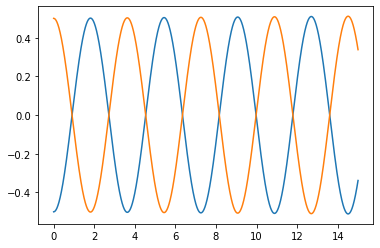

In [465]:
import matplotlib.pyplot as plt

t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0,0],.001 )

plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

#Valor del tiempo para diferentes condiciones iniciales y parámetros


In [466]:
#Distintos Parámetro
k1 = 0.8
k2 = 0.5
k3 = 0.6
m1 = 3.0 
m2 = 2.0

t, Q_Traj2 = integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0,0],.001 )

Constantes de resortes: k1 = 0.8 k2 = 0.5 k3 = 0.6
Masas: m1 = 3.0 m2 = 2.0
Tiempo de computo = 1573879612.28769s


In [467]:
#Distintas Condiciones Iniciales
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0 
m2 = 1.0

t, Q_Traj3 = integrador_simple(Q_Dot_t,[0,15],[-0.8,1.5,0.6,0],.001 )

Constantes de resortes: k1 = 1.0 k2 = 1.0 k3 = 1.0
Masas: m1 = 1.0 m2 = 1.0
Tiempo de computo = 1573879612.42141s


In [468]:
#Distintas Condiciones Iniciales Y Parámetros
k1 = 1.0
k2 = 0.9
k3 = 0.2
m1 = 3.0 
m2 = 1.0

t, Q_Traj4 = integrador_simple(Q_Dot_t,[0,15],[-0.8,0,0.6,1.3],.001 )

Constantes de resortes: k1 = 1.0 k2 = 0.9 k3 = 0.2
Masas: m1 = 3.0 m2 = 1.0
Tiempo de computo = 1573879612.57680s


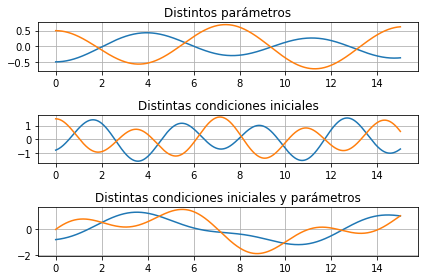

In [469]:

plt.subplot(311)
plt.plot(t,Q_Traj2[:,0])
plt.plot(t,Q_Traj2[:,1])
plt.title('Distintos parámetros')
plt.grid(True)

plt.subplot(312)
plt.plot(t,Q_Traj3[:,0])
plt.plot(t,Q_Traj3[:,1])
plt.title('Distintas condiciones iniciales')
plt.grid(True)

plt.subplot(313)
plt.plot(t,Q_Traj4[:,0])
plt.plot(t,Q_Traj4[:,1])
plt.title('Distintas condiciones iniciales y parámetros')
plt.grid(True)


plt.tight_layout()
plt.show()



#Cálculo de la energía en cada paso del tiempo

El Hamiltoniano para este caso corresponde a la energía, entonces 

\begin{align}
E&=H=T+V \\
T&=\frac{P_1}{m_1}+\frac{P_2}{m_1}  \\
V&=\frac{1}{2}k_1x_1^2+\frac{1}{2}k_2x_2^2+\frac{1}{2}k_3x_3^2
\end{align}

In [0]:
k1 = 1.0
k2 = 1.0
k3 = 1.0
m1 = 1.0 
m2 = 1.0

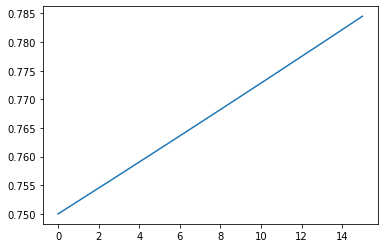

In [471]:
E = np.zeros((Q_Traj.shape[0],1))
E[:,0] = (1/2)*(Q_Traj[:,2]**2/m1 + Q_Traj[:,2]**2/m2 + k1*Q_Traj[:,0]**2 + k3*Q_Traj[:,1]**2 + k2*(Q_Traj1[:,1] - Q_Traj[:,0])**2)
plt.plot(t,E[:,0])


#Problema de N masas acopladas

Supongamos que tenemos una cadena de $N$ partículas de masa m, en línea, estando cada partícula atada a las dos partículas que la preceden y suceden por una fuerza de Hooke de constante $κ$. Supongamos que las partículas sólo pueden desplazarse en una dirección y al desplazamiento de la partícula $i$ a partir de la posición de equilibrio lo denominaremos $u_i$; además supondremos que los extremos están fijos lo cual modelizaremos estableciendo que los desplazamientos $u_0$ y $u_{N+1}$ son nulos para las partículas $0$ y ($N+1$).


\begin{align}
H&=\displaystyle\sum_{i=1}^N \frac{P_i^2}{2m} + \displaystyle\sum_{i=1}^N \frac{k}{2}(u_{i+1} - u_i)^2 \\
\dot{x_2}&=\frac{P_i}{m}  \\
\dot{p_{1x}}&=k(u_{i+1} -2u_i + u_{i-1}) \\
\end{align}

In [0]:
def W(f, t, y_0, dt):
  #Calcula la trayectoria de valores de y usando el metodo de Euler con pasos constantes
  # f - función que calcula la derivada y(t), f(t,y)
  # y_0 - valor inicial de y y_0 = [y0_0, y1_0,...]
  #t - lista con el intervalo [t_0, t_f]
  #dt - distancia entre pasos de tiempo
  tiempo = time.time()

  t_0, t_f = t
  n = int((t_f - t_0)/dt)
  
  d = len(y_0)
  
  y_tray = np.zeros(((n+1), d))
  
  t = np.linspace(t_0, t_f, n+1)
  
  y_tray[0, :] = y_0
  
  for i in range(n):
    y_tray[i+1, :] = paso_euler(f, t[i], y_tray[i, :], dt)
  print('Constantes de resortes: k1 = ' + str(k1) + ' k2 = ' + str(k2) + ' k3 = ' + str(k3))
  print('Masas: m1 = ' + str(m1) + ' m2 = ' + str(m2))
  print('Tiempo de computo = ' + ('%.5f' %tiempo) + 's')
  return t, y_tray

In [0]:
def Q_Dot_t(t,y):
  return Q_Dot(y)

In [474]:
m = 1.0
k = 1.0

n = int(input('numero de masas: '))
#condiciones iniciales
x = [] 
p = [] 
C = [] 


for t in range (1,int(n)+1):
  x.append(float(input('Posición inicial de la masa '+str(t)+' :')))


for T in range (1,int(n)+1):
  p.append(float(input('Momento incial de la masa '+str(T)+' :')))

C = np.asarray(x+p) 

def Q2_dot(f):
  X = []
  P = []
  X_DOT = []
  P_DOT = []
  for i in range (int(n)):
    X.append(float(f[i]))
  for j in range (int(n),2*int(n)):
    P.append(float(f[j]))
  for l in range (int(n)):
    X_DOT.append(float(P[l]/m))
  for item in range (int(n)):
    X.append(0) 
    P_DOT.append(k*(X[item+1]-2*X[item]+X[item-1]))
    X.pop(n) 
  X_DOT.extend(P_DOT) 
  return np.asarray(X_DOT)
  del X_DOT[:]

numero de masas: 3
Posición inicial de la masa 1 :0.5
Posición inicial de la masa 2 :-0.5
Posición inicial de la masa 3 :1
Momento incial de la masa 1 :0
Momento incial de la masa 2 :0
Momento incial de la masa 3 :0


In [475]:
t, Q_Traj = W(Q_Dot_t,[0,15],C,0.0001)

for i in range(n):
  plt.plot(t,Q_Traj[:,i])

ValueError: ignored